In [1]:
from utils.reader import AnnotationReader, ImageReader
from utils.bb import BB
from evaluation.ap import mean_average_precision
from utils.plotting import plot_detections 
from evaluation.iou import compute_iou_over_time
from matplotlib import pyplot as plt

from bgestimation.gaussian_estimation import GaussianBGEstimator

import cv2
import numpy as np
import math 

In [2]:
#Paths to images
gt_path = 'datasets/aicity/ai_challenge_s03_c010-full_annotation.xml'
img_path = 'datasets/aicity/AICity_data/train/S03/c010/frames/'
det_path = 'datasets/aicity/AICity_data/train/S03/c010/det/'
mask_path = 'datasets/aicity/AICity_data/train/S03/c010/masks/'

In [3]:
print('\n\n------------------- Initialization -------------------')
gestimator = GaussianBGEstimator(img_path, mask_path)
gmodel = gestimator.train(color=False)

  1%|          | 4/535 [00:00<00:13, 37.98it/s]

------------------- Initialization -------------------
Training estimator:
[1/2] Computing mean for training frames (535/2141):
100%|██████████| 535/535 [00:20<00:00, 26.52it/s]datasets/aicity/AICity_data/train/S03/c010/frames/frame_0535.png



In [4]:
gestimator.save_trained('./models/gaussian.pkl')

In [7]:
pklestimator = GaussianBGEstimator(img_path, mask_path)
pklestimator.load_pretrained('./models/gaussian.pkl')


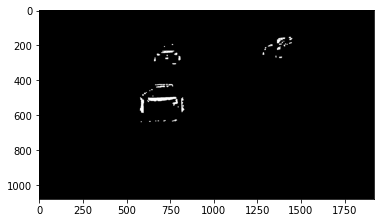

(1080, 1920)


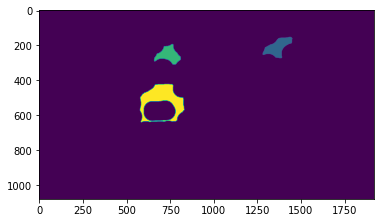

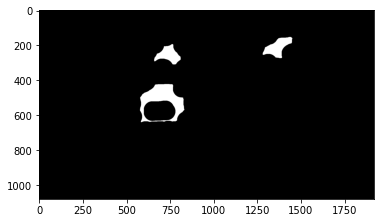

In [32]:
kernel = np.ones((5,5))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')
plt.show()
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(100,100))
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
num, comps = cv2.connectedComponents(closing)
output = cv2.connectedComponentsWithStats(closing)
(numLabels, labels, stats, centroids) = output

frame_dets = []
num_frame = 0
for i in range(1,numLabels):
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    frame_dets.append( BB(535, 535, 'car', x, y, x+w, y+h, 1) )

print(np.shape(comps))
plt.imshow(comps)
plt.show()
plt.imshow(closing, cmap='gray')
plt.show()

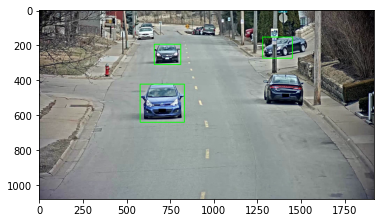

In [33]:
from utils.plotting import plot_detections
plot_detections(frame_dets)